Enter the mass of the first object (in kg): 5.972e24
Enter the mass of the second object (in kg): 7.34767309e22
Enter the distance between the two objects (in km): 384400
Lagrange points: L_1=0.8368983210384331, L_2=1.1556953003003803, L_3=-1.0050640688525563


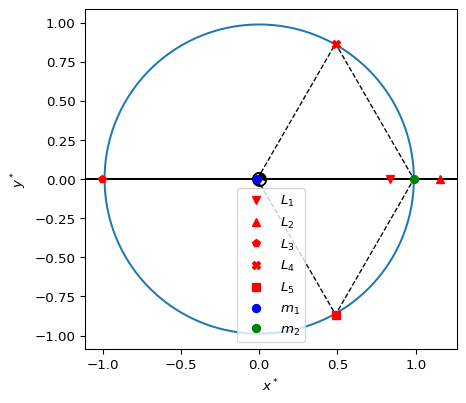

In [3]:
# import necessary libs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from scipy.optimize import newton

mass_1 = float(input("Enter the mass of the first object (in kg): "))
mass_2 = float(input("Enter the mass of the second object (in kg): "))
distance = float(input("Enter the distance between the two objects (in km): "))

def plot_orbits(mass_1, mass_2, distance):
    # Define the shape for the center of mass of the system
    circle = mpath.Path.unit_circle()
    wedge_1 = mpath.Path.wedge(90, 180)
    wedge_2 = mpath.Path.wedge(270, 0)

    vertices = np.concatenate([circle.vertices, wedge_1.vertices[::-1, ...], wedge_2.vertices[::-1, ...]])
    codes = np.concatenate([circle.codes, wedge_1.codes, wedge_2.codes])
    center_of_mass_shape = mpath.Path(vertices, codes)

    # Define the masses for the system
    mass_ratio = mass_2/(mass_1 + mass_2)

    # Calculate the coordinates of the orbits of the two masses
    x_2 = (1 - mass_ratio) * np.cos(np.linspace(0, np.pi, 100))
    y_2 = (1 - mass_ratio) * np.sin(np.linspace(0, np.pi, 100))
    x_1 = (-mass_ratio) * np.cos(np.linspace(0, np.pi, 100))
    y_1 = (-mass_ratio) * np.sin(np.linspace(0, np.pi, 100))

    # Define the collinear Lagrange point equation
    def collinear_lagrange(xstar, mass_ratio):
        term_1 = xstar
        term_2 = (1 - mass_ratio) / np.abs(xstar + mass_ratio)**3 * (xstar + mass_ratio)
        term_3 = mass_ratio / np.abs(xstar - 1 + mass_ratio)**3 * (xstar - 1 + mass_ratio)
        return term_1 - term_2 - term_3

    # Use the Newton method to find the roots of the collinear Lagrange point equation
    initial_guess = 1
    newton(collinear_lagrange, initial_guess, args=(mass_ratio,))

    L_2 = newton(func=collinear_lagrange, x0=1, args=(mass_ratio,))
    L_1 = newton(func=collinear_lagrange, x0=0, args=(mass_ratio,))
    L_3 = newton(func=collinear_lagrange, x0=-1, args=(mass_ratio,))

    # Print the Lagrange points
    print(f"Lagrange points: {L_1=}, {L_2=}, {L_3=}")

    # Create the plot
    fig, ax = plt.subplots(figsize=(5,5), dpi=96)
    ax.set_xlabel("$x^*$")
    ax.set_ylabel("$y^*$")

    # Plot the orbits
    ax.axhline(0, color='k')
    ax.plot(np.hstack((x_2, x_2[::-1])), np.hstack((y_2, -y_2[::-1])))
    ax.plot(np.hstack((x_1, x_1[::-1])), np.hstack((y_1, -y_1[::-1])))
    ax.plot([-mass_ratio, 0.5 - mass_ratio, 1 - mass_ratio,
             0.5 - mass_ratio, -mass_ratio],[0, np.sqrt(3)/2, 0, -np.sqrt(3)/2, 0],
             'k', ls="--", lw=1)

    # Plot the Lagrange Points and masses
    ax.plot(L_1, 0, 'rv', label="$L_1$")
    ax.plot(L_2, 0, 'r^', label="$L_2$")
    ax.plot(L_3, 0, 'rp', label="$L_3$")
    ax.plot(0.5 - mass_ratio, np.sqrt(3)/2, 'rX', label="$L_4$")
    ax.plot(0.5 - mass_ratio, -np.sqrt(3)/2, 'rs', label="$L_5$")
    ax.plot(0, 0, 'k', marker=center_of_mass_shape, markersize=10)
    ax.plot(-mass_ratio, 0, 'bo', label="$m_1$")
    ax.plot(1 - mass_ratio, 0, 'go', label="$m_2$")
    ax.legend()
    ax.set_aspect("equal")
    plt.show()

plot_orbits(mass_1, mass_2, distance)